## Points of Dispense Analysis

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [42]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')
bg_included = pd.read_csv('data/bg_pop_included.csv')
pods = pd.read_csv('data/POD_ids.csv')

In [43]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [44]:
dist = dist_miles.values
N = population['population'].values
prop = bg_included['all_included'].values

In [45]:
infile = open('pods_open_total2','rb')
pods_total = pickle.load(infile)
infile.close()

In [46]:
infile = open('pods_open_minmax2','rb')
pods_minmax = pickle.load(infile)
infile.close()

### Comparing average and maximum distance by PODs opened

In [47]:
dist_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_total.keys():
    dist_compare['num_pods'].append(k)
    
    # Minimize total distance
    total_list = [N[j] * [dist[j,i]] for [j,i] in pods_total[k]]
    total_list_flat = [item for sublist in total_list for item in sublist]
    avg_total = sum(total_list_flat)/len(total_list_flat)
    max_total = max(total_list_flat)
    
    # Minimize maximum distance
    minmax_list = [N[j] * [dist[j,i]] for [j,i] in pods_minmax[k]]
    minmax_list_flat = [item for sublist in minmax_list for item in sublist]
    avg_minmax = sum(minmax_list_flat)/len(minmax_list_flat)
    max_minmax = max(minmax_list_flat)
    
    dist_compare['max_dist_total'].append(max_total)
    dist_compare['max_dist_minmax'].append(max_minmax)
    dist_compare['avg_dist_total'].append(avg_total)
    dist_compare['avg_dist_minmax'].append(avg_minmax)

In [48]:
dist_df = pd.DataFrame(dist_compare)

In [49]:
dist_df.head()

,num_pods,max_dist_total,max_dist_minmax,avg_dist_total,avg_dist_minmax
0,9,13.775728,10.204330,4.267829,5.788617
1,11,11.980543,8.611634,3.925441,5.546673
2,13,11.980543,8.035054,3.627632,4.868010
3,15,11.980543,7.387465,3.359295,4.518930
4,17,10.216086,7.161360,3.154158,4.295560


In [50]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

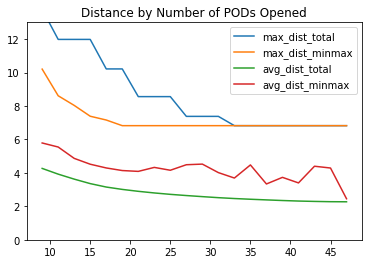

In [51]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened')
# add axis labels
plt.legend(cols)
plt.ylim(0, 13)
plt.show()

In [52]:
cols = ['max_dist_total','avg_dist_total']

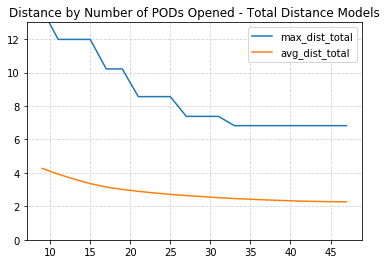

In [53]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Total Distance Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='--')
plt.ylim(0, 13)
plt.show()

In [54]:
cols = ['max_dist_minmax','avg_dist_minmax']

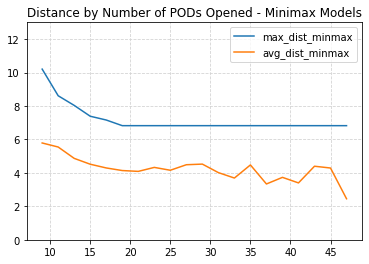

In [55]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Minimax Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='--')
plt.ylim(0, 13)
plt.show()

### Histograms

In [56]:
# Get count of number of times each POD is in a solution given 10-47 PODs open

pods_open = []
hist_list = []

for p in pods_total.keys():
    for i in pods_total[p]:
        pods_open.append(i[1])
    hist_list.append(list(set(pods_open)))
    pods_open = []


# count number of times each POD is in solution
pod_ids = list(np.arange(0,47))

pod_count = [0] * 47

for i in hist_list:
    for v in pod_ids:
        if (v in i):
            pod_count[v] += 1 

In [57]:
pods["solution_count"] = pod_count
pods.reindex(columns=["id","site","solution_count"]).sort_values(by=["solution_count"], axis=0, ascending=False)

,id,site,solution_count
23,24,NORTH ALLEGHENY HIGH SCHOOL,20
29,30,PITTBURGH OBAMA 6-12,20
22,23,MT. LEBANON HIGH SCHOOL,20
19,20,MCKEESPORT AREA HIGH SCHOOL,20
40,41,STO-ROX SR HIGH SCHOOL,19
33,34,RIVERVIEW SENIOR HIGH SCHOOL,19
21,22,MOON AREA HIGH SCHOOL,19
17,18,HIGHLANDS HIGH SCHOOL,19
16,17,HAMPTON HIGH SCHOOL,19
15,16,GATEWAY HIGH SCHOOL,18


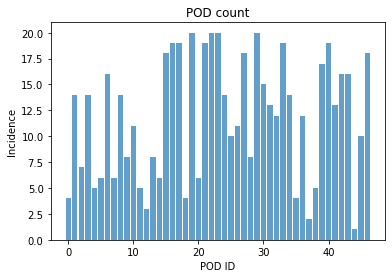

In [34]:
plt.bar(pod_ids, pod_count, align='center', alpha=0.7)
plt.ylabel('Incidence')
plt.xlabel('POD ID')
plt.title('POD count')
plt.show()

### Population

In [58]:
population.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,flood,anthrax
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,0,1.0
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,0,1.0
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,0,0.9
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,0,0.7
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,0,1.0


In [67]:
# set number of pods to open (10-47)
num_pods_open = 19

#Merge population and pod data frames
pods_open = pd.DataFrame(pods_total[num_pods_open])
pods_open.columns = ["bg","pod"]

pods_open = pd.merge(population,
                     pods_open,
                     left_on = 'bg_id',
                     right_on = 'bg',
                     how = 'left')

pods_open.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,flood,anthrax,bg,pod
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,0,1.0,1.0,6.0
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,0,1.0,2.0,30.0
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,0,0.9,3.0,30.0
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,0,0.7,4.0,27.0
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,0,1.0,5.0,27.0


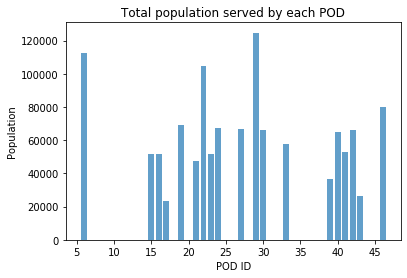

The average number of people served by a POD is 64,289


In [68]:
pods_open = pods_open.groupby("pod").population.sum().reset_index()

plt.bar(pods_open['pod'], pods_open['population'],align='center', alpha=0.7)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.title('Total population served by each POD')
plt.show()

print("The average number of people served by a POD is",  "{:,.0f}".format(np.average(pods_open['population'])))

In [66]:
pods_open

,pod,population
0,6.0,112730
1,15.0,51917
2,16.0,51574
3,17.0,23248
4,19.0,68860
5,21.0,47540
6,22.0,104540
7,23.0,51413
8,24.0,67050
9,27.0,66910


### Number of cars and distance between block group and PODs

In [69]:
# analysis on number of hhs with no car and distance between block group and POD
# avg distance between POD and its selected BGs

In [70]:
pods_open = pd.DataFrame(pods_total[num_pods_open])
pods_open.columns = ["bg","pod"]
pods_open.head()

,bg,pod
0,0,6
1,1,6
2,2,30
3,3,30
4,4,27


In [ ]:
bg_pod_dist = []
    
for i in np.arange(0,len(pods_open)):    
    bg_pod_dist.append(dist_miles.iloc[pods_open.iloc[i,0],(pods_open.iloc[i,1]-1)])

bg_pod_dist = pd.merge(pods_open, 
                pd.DataFrame(bg_pod_dist), 
                left_index=True, 
                right_index=True)

bg_pod_dist.columns = ["bg","pod","distance"]

In [ ]:
bg_pod_dist = pd.merge(population,
                bg_pod_dist,
                left_on = 'bg_id',
                right_on = 'bg',
                how = 'left')

# calculate proportion of households with no car
bg_pod_dist['prop_hh_no_car'] = bg_pod_dist['hh_no_car']/bg_pod_dist['num_hhs']
bg_pod_dist.head()

In [ ]:
pod_no_car = bg_pod_dist.groupby("pod").hh_no_car.sum().reset_index()
print(pod_no_car)

plt.bar(pod_no_car['pod'], pod_no_car['hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Number of HHs with No Car')
plt.xlabel('POD ID')
plt.title('Number of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("The average number of households with no car is",  "{:,.0f}".format(np.average(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the highest number of households with no car:",  "{:,.0f}".format(np.max(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the lowest number of households with no car is",  "{:,.0f}".format(np.min(pod_no_car['hh_no_car'])))

In [ ]:
pod_prop_no_car = bg_pod_dist.groupby("pod").prop_hh_no_car.mean().reset_index()
print(pod_prop_no_car)

plt.bar(pod_prop_no_car['pod'], pod_prop_no_car['prop_hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Percentage')
plt.xlabel('POD ID')
plt.title('Percent of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("Average percentage of households with no car is",  "{:,.2f}".format(np.average(pod_prop_no_car['prop_hh_no_car'])), ".")
print("The POD with the highest percentage of households with no car is",  "{:,.2f}".format(np.max(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")
print("The POD with the lowest percentage of households with no car is",  "{:,.2f}".format(np.min(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")

In [ ]:
pod_dist = bg_pod_dist.groupby("pod").distance.mean().reset_index()
print(pod_dist)

plt.bar(pod_dist['pod'], pod_dist['distance'],align='center', alpha=0.7)
plt.ylabel('Distance (miles)')
plt.xlabel('POD ID')
plt.title('Average Distance between POD and Assigned Block Groups (Miles)')
plt.show()

# add POD id #
print("The average distance between a POD and Block Group is",  "{:,.2f}".format(np.average(pod_dist["distance"])), "miles")
print("POD X has the lowest average distance between POD and block group at",  "{:,.2f}".format(np.min(pod_dist["distance"])), "miles")
print("POD X has the highest average distance between POD and block group at",  "{:,.2f}".format(np.max(pod_dist["distance"])), "miles")


### POD capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())